In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt 

def neighbors(matrix, rowNumber, colNumber):
    result = []
    for rowAdd in range(-1, 2):
        newRow = rowNumber + rowAdd
        if newRow >= 0 and newRow <= len(matrix)-1:
            for colAdd in range(-1, 2):
                newCol = colNumber + colAdd
                if newCol >= 0 and newCol <= len(matrix)-1:
                    if (newCol == colNumber and newRow == rowNumber) or (rowAdd!=0 and colAdd!=0):
                        continue
                    result.append(matrix[newCol][newRow])
                    
    return result
    # result = [matrix[i][j] for i in range(rowNumber-1, rowNumber+2) 
    #           for j in range(colNumber-1, colNumber+2) 
    #           if 0 <= i < len(matrix) and 0 <= j < len(matrix) 
    #           and (i != rowNumber or j != colNumber) and (i == rowNumber or j == colNumber)]
    # return result

def mag_map(Arr, size):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    arrow_direction = 'down'  # Initialize arrow_direction before the loops
    for i in range(0,size+2):
        for j in range(0,size+2):
            if Arr[i, j] == 1:
                arrow_color = 'black'
                arrow_direction = 'down'  # Update arrow_direction when Arr[i, j] is 1
            else:
                arrow_color = 'red'
                arrow_direction = 'up'  # Update arrow_direction when Arr[i, j] is not 1
            
            ax.arrow(j + 0.5, i + 0.5, 0, 0.2 if arrow_direction == 'down' else -0.2, 
                     head_width=0.1, head_length=0.1, fc=arrow_color, ec=arrow_color)

    ax.set_xlim(-0.5, size+2)
    ax.set_ylim(-0.5, size+2)
    ax.set_xticks(np.arange(0, size+2, 1))
    ax.set_yticks(np.arange(0, size+2, 1))
    ax.grid(color='k', linestyle='-', linewidth=1, alpha=0.1)


def reg_lin(x,y):    
    avg_x=np.average(x)
    avg_y=np.average(y)
    avg_x_squared=np.average(x*x)
    avg_x_y=np.average(x*y)
    avg_y_squared=np.average(y*y)
    a=(avg_x_y-avg_x*avg_y)/(avg_x_squared-avg_x**2)
    b=avg_y-a*avg_x
    r=a*np.sqrt(avg_x_squared-avg_x**2)/np.sqrt(avg_y_squared-avg_y**2)
    return a,b,r

    


T:4.992989357459576,M(T)-58.0
T:11.620969131039693,M(T)8.0
T:-172.1469157087748,M(T)2.0


Text(0, 0.5, 'M(T)')

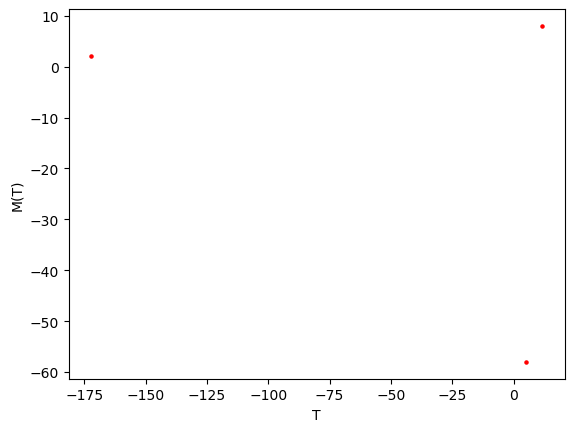

In [14]:
#48 48 10000 3 1500 2308 3000
user_input = input('sizex, sizey, steps, amounts_of_demon_inputs demons[]')
inputs = user_input.split()
sizex, sizey, steps, amounts_of_demon_inputs = map(int, inputs[:4])
demon_inputs = np.array(list(map(int, inputs[4:])))
s=(sizex+2,sizey+2)
Arr=np.ones((s))

max_energy=sizex*sizey*2

current_energy=-max_energy

final_x=[]
final_y=[]
demon_inputs=[i for i in range(int(max_energy/2),max_energy*10,int(max_energy/10))]

for demon in demon_inputs:

    number_counts = {}
    sum=[]
    ene=[]
    it=[]
    dem=[]
    Arr=np.ones((s))

    for i in range(steps):
           

        x=random.randint(1, sizex)
        y=random.randint(1, sizey)
        buf=-Arr[x][y]
        result=neighbors(Arr,x,y)
        cost=0
        current_cost=0
        new_cost=0
        for current in result:
            current_cost+=buf*current#do sprawdzenia
            new_cost+=-buf*current#do sprawdzenia
        cost=current_cost-new_cost
        if demon>=-cost : 
            
            #data for histogram 
            if int(demon) in number_counts:
                        number_counts[int(demon)] += 1
            else:
                        number_counts[int(demon)] = 1    
            demon+=cost
            current_energy-=cost
            Arr[x][y]=-Arr[x][y]
        #boundary conditions
        Arr[sizey+1, :] = Arr[1, :]
        Arr[0, :] = Arr[sizey, :]
        Arr[:, sizex+1] = Arr[:, 1]
        Arr[:, 0] = Arr[:, sizex]
        #for demon energy
        dem.append(demon)
        #for total energy of the board   
        ene.append(current_energy)
        #for iteratinos
        it.append(i)
        #for magnetization
        #sum.append(abs(np.sum(Arr)))
        sum.append(np.sum(Arr))

    x_hist=np.array(list(number_counts.keys()))
    y_hist=np.array(list(number_counts.values()))
    log_y_hist=np.log(y_hist)
    number_counts = {key: value for key, value in number_counts.items() if value > 8}# to jest chyba dobrze
    x_hist_wo_0=np.array(list(number_counts.keys()))
    y_hist_wo_0=np.array(list(number_counts.values()))
    log_y_hist_wo_0=np.log(y_hist_wo_0)
    #sum=abs(np.array(sum))#abs?
    a,b,r=reg_lin(x_hist_wo_0,log_y_hist_wo_0)
    T=-1/a
    reg=np.dot(x_hist_wo_0,a)+b

    # plt.figure()
    # plt.scatter(it,dem,s=5)
    # plt.xlabel('iterations')
    # plt.ylabel('demon energy')
    

    # plt.figure()
    # plt.scatter(x_hist,y_hist,s=5,color='purple')
    # plt.xlabel('value')
    # plt.ylabel('encounters')


    # plt.figure()
    # plt.scatter(x_hist,log_y_hist,s=5,color='green')
    # plt.xlabel('value')
    # plt.ylabel('log(encounters)')
    # # a,b,r=reg_lin(x_hist,log_y_hist)
    # # T=-1/a
    # # reg=np.dot(x_hist,a)+b
    # # plt.plot(x_hist,reg,color='red')

    # plt.figure()
    # plt.scatter(x_hist_wo_0,y_hist_wo_0,s=5,color='blue')
    # plt.xlabel('value w/o 0')
    # plt.ylabel('encounters w/o 0')


    # plt.figure()
    # plt.scatter(x_hist_wo_0,log_y_hist_wo_0,s=5,color='brown')
    # plt.xlabel('value w/o 0')
    # plt.ylabel('log(encounters w/o 0)')
    # a,b,r=reg_lin(x_hist_wo_0,log_y_hist_wo_0)
    # T=-1/a
    # reg=np.dot(x_hist_wo_0,a)+b
    # plt.plot(x_hist_wo_0,reg,color='red')
    # print(f'T:{T}')

    # plt.figure()
    # plt.scatter(it,sum,s=5,color='red')
    # plt.xlabel('iterations')
    # plt.ylabel('Magnetizatino')
    final_x.append(T)
    unique_elements, counts = np.unique(sum, return_counts=True)

    most_frequent_index = np.argmax(counts)
    avg_mag = unique_elements[most_frequent_index]

# Print the most frequent element

    final_y.append(avg_mag)
for i in range(len(final_x)):
    print(f'T:{final_x[i]},M(T){final_y[i]}')

plt.figure()
plt.scatter(final_x,final_y,s=5,color='red')
plt.xlabel('T')
plt.ylabel('M(T)')

    



In [54]:
size,demon,steps=[int(x) for x in input("size: demon: steps: ").split()]
s=(size+2,size+2)
Arr=np.ones((s))
max_energy=size*size*2

current_energy=-max_energy
step=int(max_energy/2)
draw=[]
Demon_Temperatures={}
xs=[]
ys=[]
for j in range(int(max_energy/2),max_energy+10*step,step):
    Arr=np.ones((s))
    sum=[]
    demon=j
    number_counts = {}
    ene=[]
    it=[]
    dem=[]
    number_counts[j]=demon
    for i in range(steps):

        x=random.randint(1, size)
        y=random.randint(1, size)
        buf=-Arr[x][y]
        result=neighbors(Arr,x,y)
        cost=0
        dem.append(demon)   
        for current in result:
            cost+=2*buf*current
        if demon>=-cost : 
            
            
            if int(demon) in number_counts:
                        number_counts[int(demon)] += 1
            else:
                        number_counts[int(demon)] = 1    
            ene.append(current_energy)
            demon+=cost
            current_energy-=cost
            Arr[x][y]=-Arr[x][y]
        Arr[size+1, :] = Arr[1, :]
        Arr[0, :] = Arr[size, :]
        Arr[:, 0] = Arr[:, size]
        Arr[:, size+1] = Arr[:, 1]
        it.append(i)
        sum.append(np.sum(Arr))
    unique_elements, count = np.unique(sum, return_counts=True)

    most_frequent_sum =unique_elements[np.argmax(count)] 

  

   
    # plt.figure()
    # plt.scatter(it,sum,s=5,color='red')
    # plt.xlabel('Iteration')
    # plt.ylabel('sum')
   
    number_counts = {key: value for key, value in number_counts.items() if value > 0}# to jest chyba dobrze
#    osc_number=max(number_counts, key=lambda k: number_counts[k])#najczesciej wystepujacy element, czyli ten wokol ktorego oscyluje.
    keys = np.array(list(number_counts.keys()))
    counts = np.array(list(number_counts.values()))
    log_counts=np.log(counts)
    a,b,r=reg_lin(keys,log_counts)
    T=-1/a
    #sum=abs(np.array(sum))#abs?
    print(f'T:{T},a:{a},most freq:{most_frequent_sum}')
    plt.figure()
    plt.scatter(keys,log_counts,s=5)
    plt.xlabel('Iteration')
    plt.ylabel('Demon Energy')
    reg=np.dot(keys,a)+b
    plt.plot(keys,reg,color='red')
    xs.append(T)
    ys.append(most_frequent_sum)

fig,ax = plt.subplots()
ax.scatter(xs,ys,color='purple')
ax.set_xlabel('T')
ax.set_ylabel('m(T)')





#mag plot
#mag_keys=np.array(list(mag_counts.keys()))
#mag_values=np.array(list(mag_counts.values()))
#plt.figure()
#plt.scatter(mag_keys,mag_values)


#Demon_Temperatures[j]=T
#mag_map(Arr,size)
#final_keys=np.array(list(Demon_Temperatures.keys()))
#final_vals=np.array(list(Demon_Temperatures.values()))

#print('m(t)',Demon_Temperatures)
#plt.scatter(final_vals,final_keys)
#print(number_counts)
# plt.figure()
# plt.scatter(keys,counts,color='red')
# plt.figure()
# plt.scatter(keys,log_counts,color='green')

#~~~~~~~~~~~~plotting~~~~~~~~
#plotting histogram
# plt.figure()
# plt.bar(keys, log_counts, align='center', alpha=0.7)
# plt.xlabel('Cost Values')
# plt.ylabel('Frequency')
# plt.title('Histogram of Cost Values')
# plt.figure()
# plt.scatter(keys,log_counts)
# #reg lin 
# x_values = np.array(keys)
# y_linear = a * x_values + b
# plt.plot(x_values,y_linear,color='red')
# fig,ax = plt.subplots()
# ax.plot(it,ene,color='green')
# ax.set_xlabel('Iterations')
# ax.set_ylabel('Energy')
# ax.spines['left'].set_position('zero')
# ax.spines['bottom'].set_position('zero')
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
# fig,ax = plt.subplots()
# ax.plot(it,dem,color='red')
# ax.set_xlabel('Iterations')
# ax.set_ylabel('Demon')

#~~~~~~~~~~~~~~~~~~~~~~~~~~
# Customize the appearance of the ticks
#ax.xaxis.set_ticks_position('bottom')
#ax.yaxis.set_ticks_position('left')48 4608 10000
#plt.show()


ValueError: too many values to unpack (expected 3)

In [9]:
print(30+(2*17**2)%28)

print(48*48*2)



Arr=np.ones((4,4))
ones=len(Arr[Arr==1])
print(ones)


48
4608
16
